# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### **[Commentary]** The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010. Each campaign involved phone marketing with a human agent as the interlocutor, and sometimes an auxiliary use of the Internet online banking channel. The results for all channels were managed in an integrated fashion and outputted together.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [363]:
import pandas as pd
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
warnings.filterwarnings('ignore')

# From Scikit Learn
from sklearn import preprocessing, decomposition, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from astropy.table import Table, Column
# Set DEBUG = True to produce debug results
DEBUG = False

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [9]:
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **[Commentary]** In the dataset, we observe a total of 21 columns. These columns are categorized into two types:

### 1) Numerical/Quantitative DataTypes:

###    Numerical data represents information in numerical form rather than in language or descriptive form. Examples include age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed.

### 2) Categorical/Qualitative DataTypes:

###    Categorical data is characterized by names or labels. Examples of categorical columns in our dataset are job, marital, education, default, housing, loan, poutcome, contact, month, day_of_week, and y.

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **[Commentary]** Utilizing the describe function provides a comprehensive understanding of the dataset. It allows us to grasp the range, means, standard deviations, maximum and minimum values, as well as percentiles of the data. This comprehensive overview enhances our ability to interpret and analyze the dataset effectively.

### Upon closer inspection, it becomes evident that the data ranges across columns exhibit significant variations. For instance, the mean of nr.employed is 5167.035911, while the mean of emp.var.rate is 0.081886. Such disparities in scales highlight the need for normalization to improve the overall quality of our data.

In [16]:
df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### **[Commentary]** We should examine the dataset for any null values. The isnull() function is employed for this purpose, which checks whether values are missing in a scalar or array-like object. Upon inspection, it is evident that our dataset does not contain any null values.

In [19]:
# Check for "Not a Number" values in dataset
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
# Check for duplicated values 
print(df.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


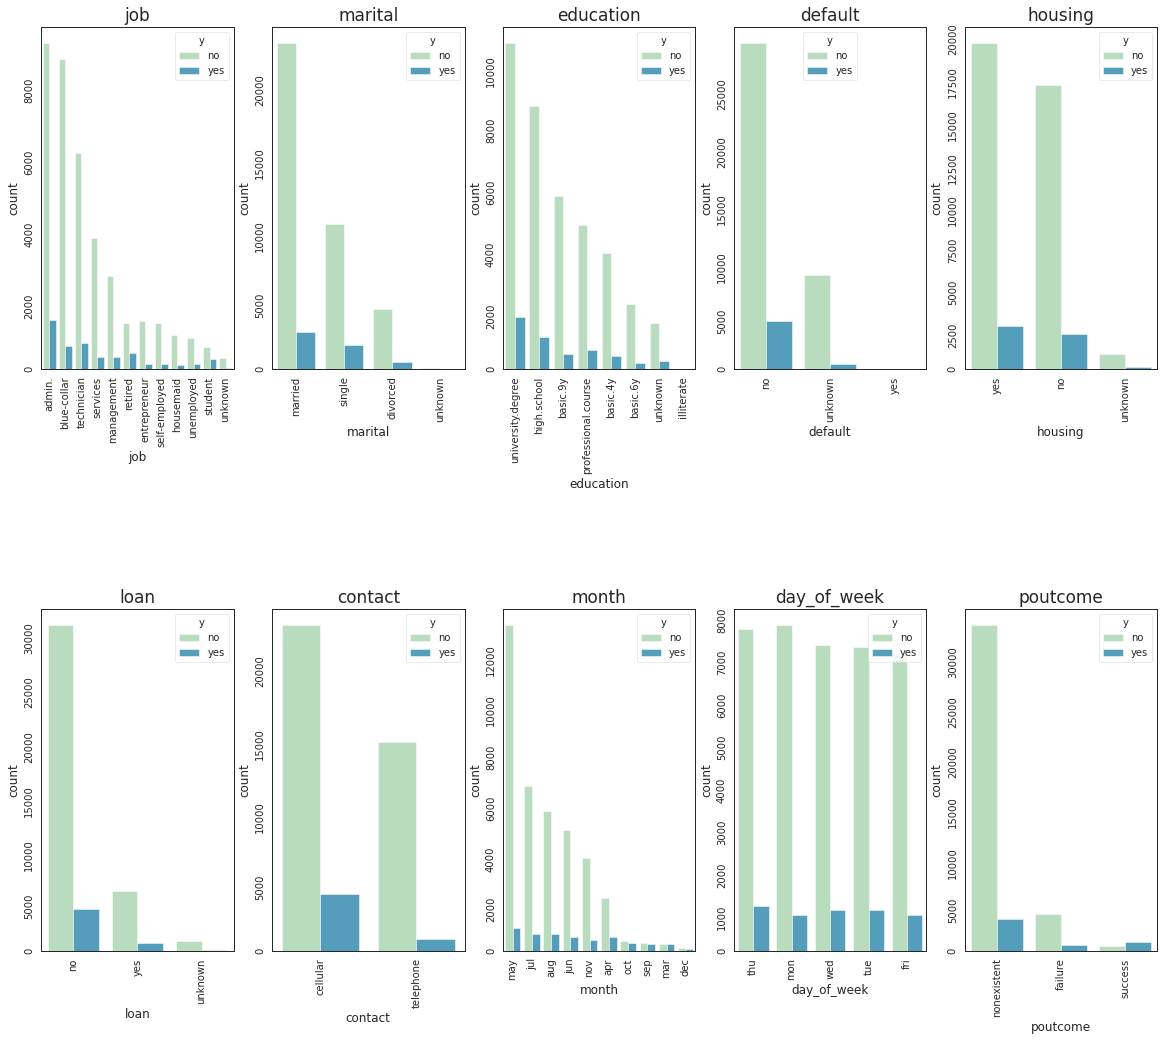

In [21]:
fig, ax = plt.subplots(2,5, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

### **[Commentary]** We have identified 12 duplicate entries in our dataset. To enhance clarity and improve prediction accuracy, we should remove these duplicates.

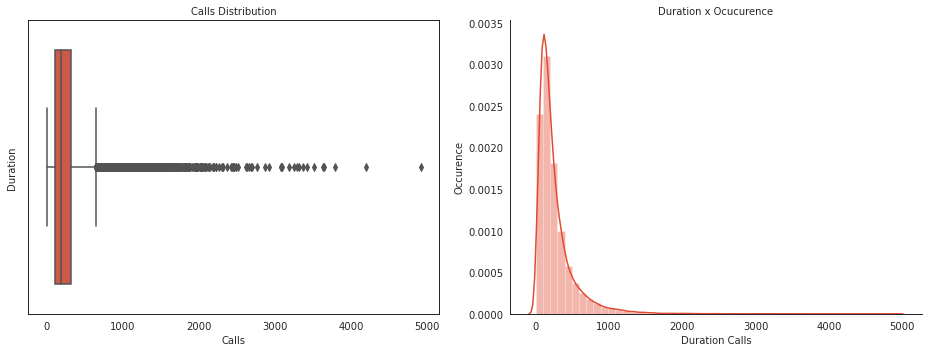

In [23]:
# Plot the Calls distribution and Duration vs Occurence

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### **[Commentary]** The 'duration' and 'age' features exhibit distinct characteristics. While 'age' has 78 unique values, 'duration' shows a broader range with 1544 different values. The majority of 'duration' values are concentrated around less than 2000, occurring across frequencies from 0 to 0.0030.

In [25]:
# Obtain the count of unique values in the 'poutcome' column

df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

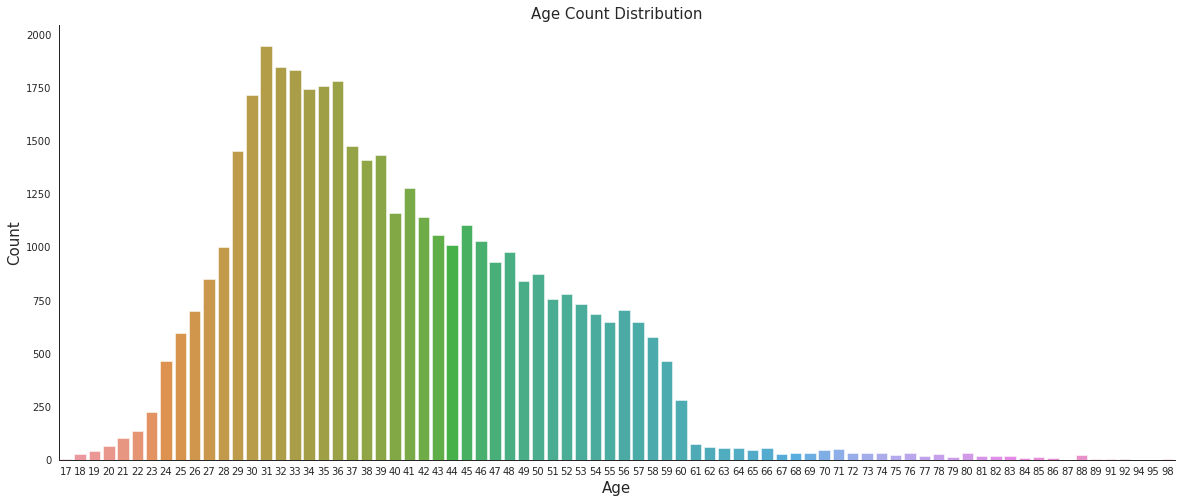

In [26]:
# Plot the age count distribution

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

### **[Commentary]** Analyzing the age distribution of clients is crucial for evaluating the suitability of campaigns, especially for term deposits, as it provides insights into customer mortality rates. This understanding informs the design and targeting of campaigns to align with the demographic characteristics of the client base.

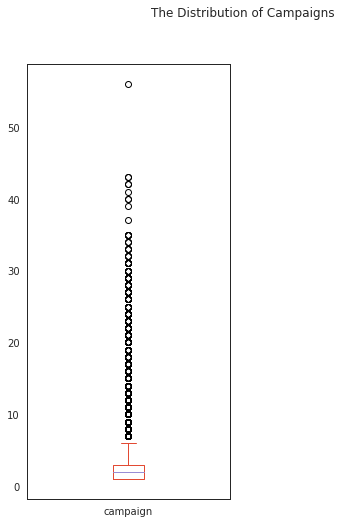

In [28]:
# Plot the distribution of campaigns

df[['campaign']].plot(kind = 'box', 
                                              figsize = (8,8),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaigns')
plt.show()

### **[Commentary]** The majority of clients have been contacted by the bank between one to three times, which is a reasonable frequency. However, there are instances where certain clients have been contacted as frequently as 58 times, indicating an unusually high contact frequency that deviates from the norm."

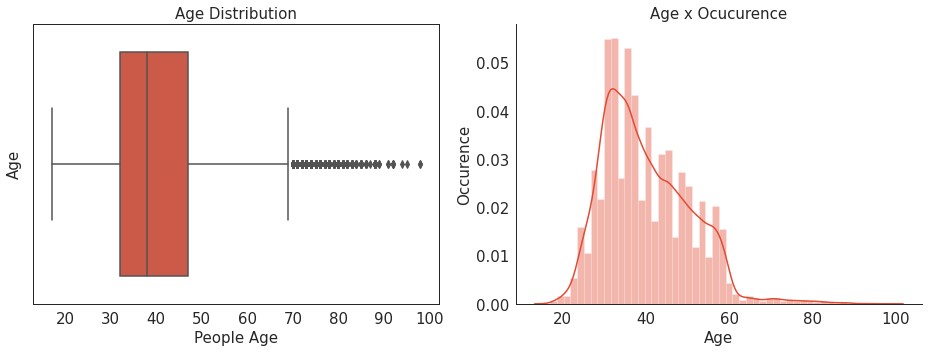

In [30]:
# Plot the Age distribution and Age vs Occurence

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### **[Commentary]** Considering the almost high dispersion observed in this graph, it is challenging to conclusively determine whether age has a significant effect on our target variable 'y.' The high and middle dispersion suggests a diverse range of ages, making it unclear if all age groups are likely to subscribe to a term deposit or not. To further explore patterns, outliers have been calculated. Consequently, my recommendation is to fit the model both with and without these outliers to better understand their impact on the results.

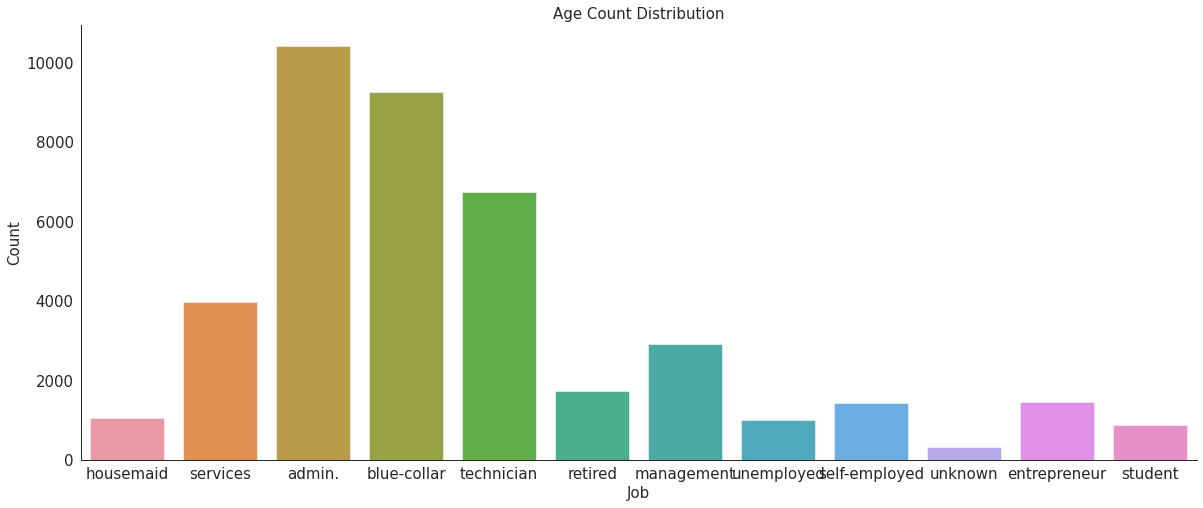

In [32]:
# Plot the Age Count distribution

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### **[Commentary]** The bank's clients have various occupations, but when cross-referencing jobs with default, loan, or housing, no discernible relationship is found.  The predominant occupations among the bank's clientele are blue-collar workers, administrators, and technicians.

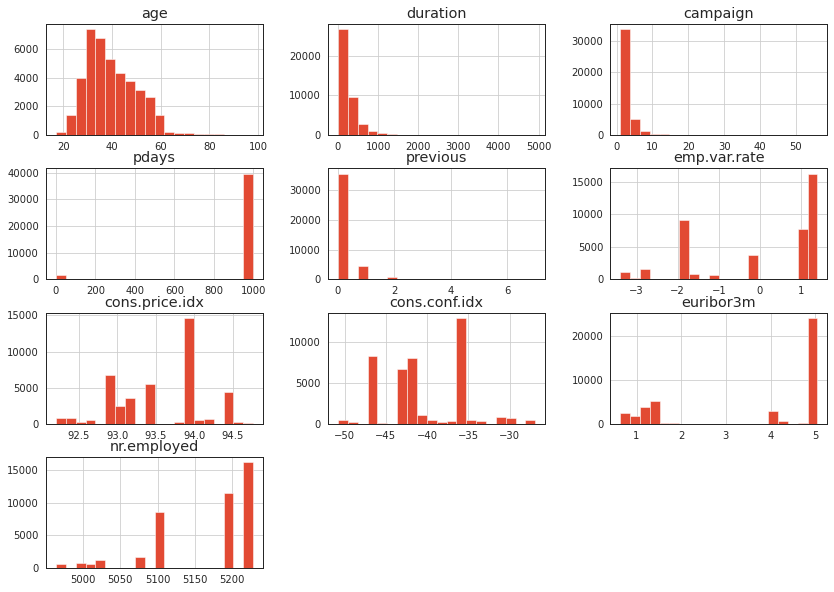

In [34]:
# Generate a histogram for each numerical column

df.hist(bins=20, figsize=(14,10))
plt.show()

In [35]:
# Handle the missing values

print(df.default.unique().tolist())
df.columns.values

['no', 'unknown', 'yes']


array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [36]:
# Count number of rows for 'y' type

df.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

In [37]:
# Count the occurrences for each feature

df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


### **[Commentary]** Understanding our dependent variable, 'y,' it is a categorical variable with values 'Yes' or 'No.' This variable indicates whether the client subscribed to a term deposit or not.

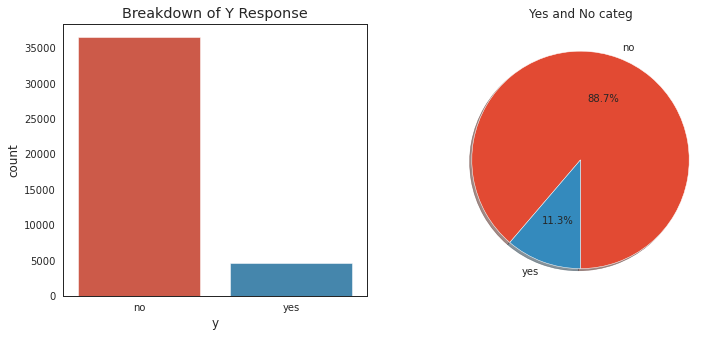

In [39]:
# Determine the breakdown of Y 

data = df
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=df)
plt.title("Breakdown of Y Response")
plt.subplot(1,2,2)
labels = data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

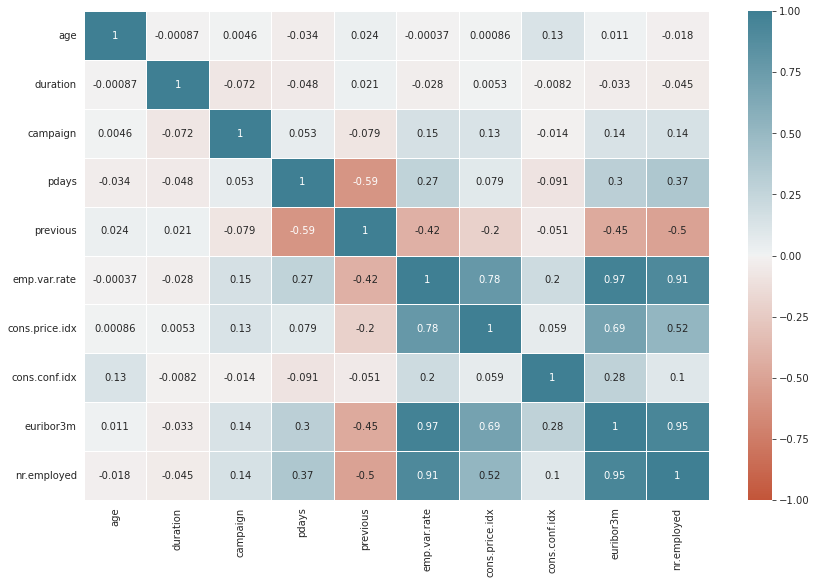

In [40]:
# Generate a heatmap to visualize the correlation matrix of the dataframe

fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

### **[Commentary]** Duration highly affects the output target (e.g., if duration=0 then y=‘no’).  Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.  Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

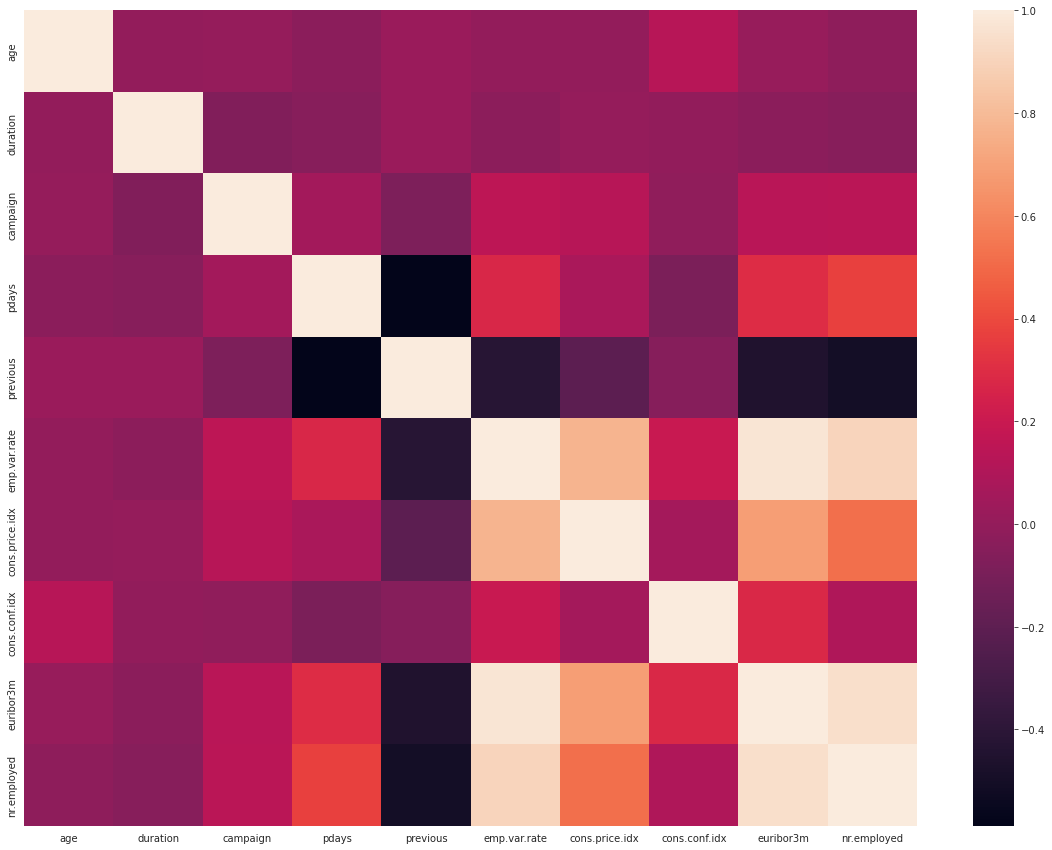

In [42]:
#  Use Pearson Correlation

plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor)
plt.show()

In [43]:
# Check the correlation among all the features in the data

df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### **[Commentary]** The business objective of the task is to develop a model that effectively explains the success of a contact, specifically whether the client subscribes to the deposit. The primary goals of this model are to enhance campaign efficiency by:

###    1. Identifying key characteristics that significantly impact success in subscribing to the deposit.
###    2. Facilitating better resource management, including human effort, phone calls, and time, through informed decision-making.
###    3. Enabling the selection of a high-quality and cost-effective set of potential customers who are likely to make a purchase.

### Achieving these objectives will contribute to a more targeted and efficient marketing strategy, optimizing the allocation of resources and improving the overall success rate of deposit subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
# Create a categorization system for bank clients to label and characterize all client attributes.

bank_client =df.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


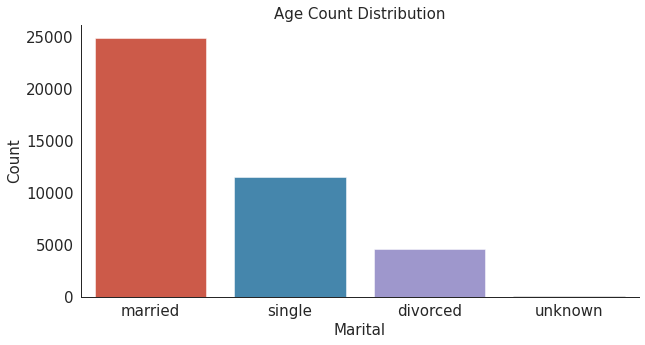

In [49]:
# The bank has clients with different marital statuses. However, when analyzing marital status in conjunction with default, loan, or housing, no correlation is evident.

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

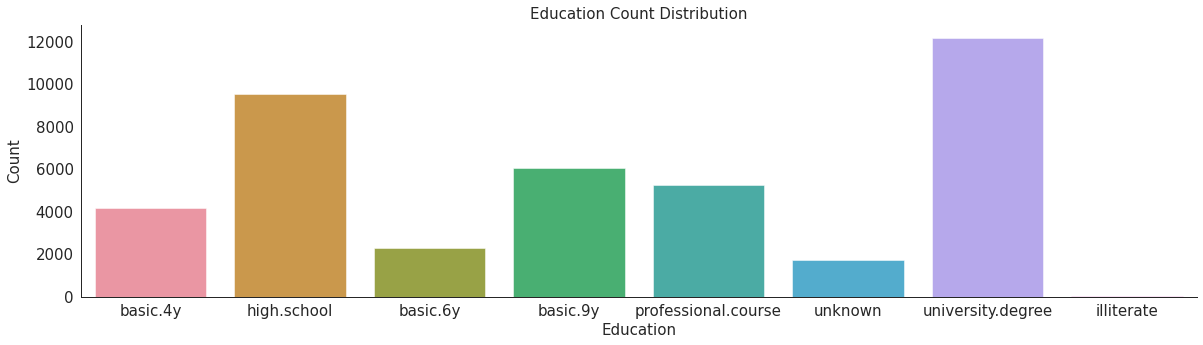

In [50]:
# The bank's clients possess various levels of education. However, when examining education in connection with default, loan, or housing, no correlation is identified.

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### **[Commentary]** Bank Client Summary

### Age, with its moderate dispersion, does not yield significant insights when related to other variables.

### For Jobs, Marital, and Education, a straightforward analysis based on the count of each variable might be the most informative. However, when related to other variables, the results are inconclusive. It's worth noting that these variables exhibit 'yes,' 'unknown,' and 'no' values for loan, default, and housing.

### To construct a socio-economic group of variables, we can create a composite variable termed 'bank_se.'

In [52]:
# Label encoder order is alphabetical

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [53]:
# Function to create different groups based on range of clients' ages, which should help due to the 78 different values here

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [54]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [55]:
# Build a social economic group of variables = bank_o

bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [56]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [57]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [58]:
# Slice DataFrame to treat separately for ease of analysis

bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [59]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [60]:
# Note if the call duration is equal to 0, then this client did not subscribe
# These lines will need to be removed later

df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [61]:
# Uncover more details regarding the campaigns

print("Type of Contact: \n", bank_related['contact'].unique())
print("\nMonths when the campaigns were held: \n", bank_related['month'].unique())
print("\nDays when the campaigns were held: \n", bank_related['day_of_week'].unique())

Type of Contact: 
 ['telephone' 'cellular']

Months when the campaigns were held: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Days when the campaigns were held: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [62]:
# Label encoder order is alphabetical

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [63]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [64]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [65]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [66]:
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [67]:
# Model definition

bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 0)

# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(bank_final, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [70]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
29321,2,7,0,3,0,2,0,1,0,0,4,-1.8,93.075,-47.1,1.405,5099.1,3,999,0,1
23925,2,10,1,6,0,2,0,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,2,999,0,1
39148,1,0,0,5,0,2,0,0,5,3,3,-1.8,93.369,-34.8,0.655,5008.7,2,999,1,2
12078,1,1,2,2,0,2,0,1,4,0,1,1.4,94.465,-41.8,4.947,5228.1,1,999,0,1
41021,1,10,2,3,0,2,0,0,8,0,2,-1.1,94.601,-49.5,1.029,4963.6,2,999,0,1


In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### **[Commentary]** To outperform the baseline, our classifier should exhibit the following qualities:

###  - High training accuracy to effectively learn from the training data.
###  - Low false positive value, indicating a minimized rate of incorrectly predicted positive instances.
###  - High test accuracy, demonstrating robust performance on unseen data.

### Additionally, we will evaluate the classifier using the area under the Receiver Operating Characteristic (ROC) Area Under the Curve (AUC), a metric that assesses the trade-off between true positive rate and false positive rate. AUC results will be categorized as follows:

###  - Excellent for AUC values between 0.9-1
###  - Good for AUC values between 0.8-0.9
###  - Fair for AUC values between 0.7-0.8
###  - Poor for AUC values between 0.6-0.7
###  - Failed for AUC values between 0.5-0.6

### The classifier of choice for this task is K-Nearest Neighbors (KNN). 

### **KNN Model**

k=1 88.16 (+/- 0.67)
k=2 89.63 (+/- 0.59)
k=3 89.48 (+/- 0.62)
k=4 89.85 (+/- 0.49)
k=5 89.94 (+/- 0.51)
k=6 90.04 (+/- 0.51)
k=7 90.13 (+/- 0.52)
k=8 90.14 (+/- 0.50)
k=9 90.23 (+/- 0.47)
k=10 90.16 (+/- 0.48)
k=11 90.26 (+/- 0.45)
k=12 90.27 (+/- 0.49)
k=13 90.28 (+/- 0.56)
k=14 90.32 (+/- 0.51)
k=15 90.37 (+/- 0.53)
k=16 90.38 (+/- 0.58)
k=17 90.35 (+/- 0.53)
k=18 90.43 (+/- 0.53)
k=19 90.42 (+/- 0.51)
k=20 90.37 (+/- 0.46)
k=21 90.37 (+/- 0.48)
k=22 90.39 (+/- 0.52)
k=23 90.41 (+/- 0.53)
k=24 90.34 (+/- 0.51)
k=25 90.37 (+/- 0.48)
The optimal number of neighbors is 17 with 90.4%


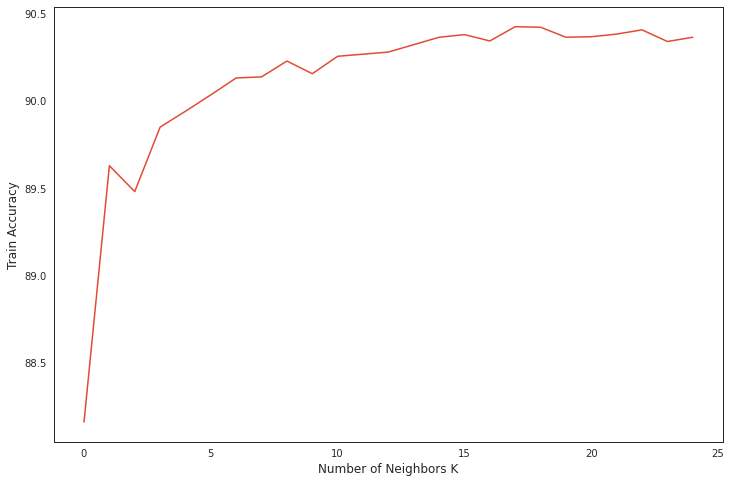

In [ ]:
# Evaluation will involve assessing the classifier's performance through metrics such as the confusion matrix and cross-validation.

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2)

# Neighbors
neighbors = np.arange(0,25)

# Create empty list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7181  138]
 [ 641  278]]
91.0


In [150]:
# KNN train model. Call model and name it clf

clf_knn = KNeighborsClassifier(n_neighbors=18, n_jobs=-1, algorithm='auto', weights='uniform')

# Call up  model to see the parameters you can tune (and their default setting)

print(clf_knn)

# Fit clf to the training data

clf_knn = clf_knn.fit(features_train, target_train)

# Predict clf DT model again test data

target_predicted_knn = clf_knn.predict(features_test)

KNeighborsClassifier(n_jobs=-1, n_neighbors=18)


In [152]:
# Check accuracy and performance of the model

acc_knn = accuracy_score(target_test, target_predicted_knn)
prec_knn = precision_score(target_test, target_predicted_knn)
recall_knn = recall_score(target_test, target_predicted_knn)
f1_knn = f1_score(target_test, target_predicted_knn)
cm_knn = confusion_matrix(target_test, target_predicted_knn)
print("KNN Accuracy Score", acc_knn)
print(classification_report(target_test, target_predicted_knn))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_knn))

KNN Accuracy Score 0.9047098810390871
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7319
           1       0.67      0.29      0.41       919

    accuracy                           0.90      8238
   macro avg       0.79      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238



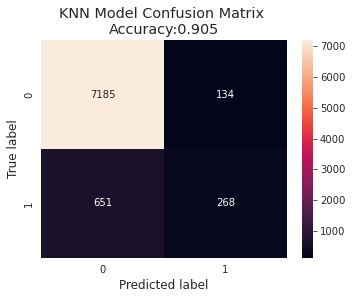

In [154]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('KNN Model Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### **Support Vector Model**

In [156]:
# Support Vector Model: Classifier, Confusion Matrix and cross validation

from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6719  600]
 [ 590  329]]
86.0


In [157]:
# Support Vector train model. Call model and name it clf

from sklearn.svm import SVC
clf_svc = SVC(probability=True, gamma='auto', max_iter=-1)

# Call up  model to see the parameters you can tune (and their default setting)

print(clf_svc)

# Fit clf to the training data

clf_svc = clf_svc.fit(features_train, target_train)

# Predict clf DT model again test data

target_predicted_svc = clf_svc.predict(features_test)

SVC(gamma='auto', probability=True)


In [159]:
# Check accuracy and performance of model

acc_svc = accuracy_score(target_test, target_predicted_svc)
prec_svc = precision_score(target_test, target_predicted_svc)
recall_svc = recall_score(target_test, target_predicted_svc)
f1_svc = f1_score(target_test, target_predicted_svc)
cm_svc = confusion_matrix(target_test, target_predicted_svc)
print("SVC Accuracy Score", acc_svc)
print(classification_report(target_test, target_predicted_svc))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_svc))

SVC Accuracy Score 0.8998543335761107
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.67      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.88      8238



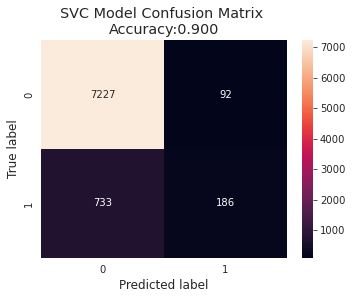

In [162]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title('SVC Model Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_svc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ROC AUC: 0.894


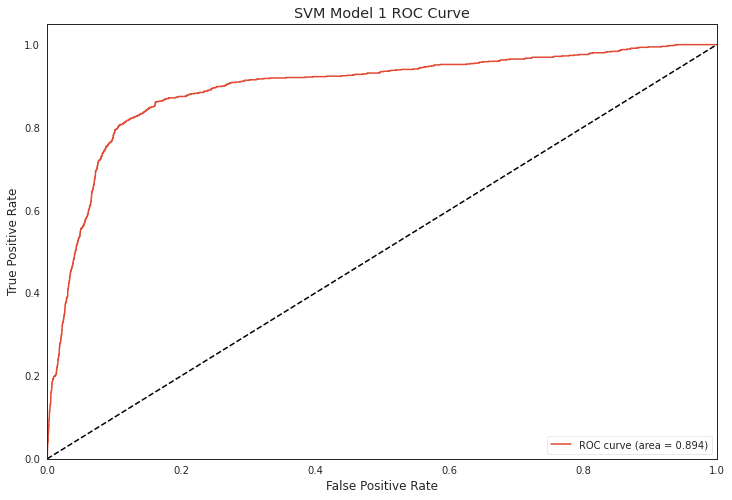

In [164]:
# Determine the false positive and true positive rates

fpr, tpr, _ = roc_curve(target_test, clf_svc.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC

roc_auc_svc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_svc)
 
# Plot of a ROC curve for a specific class

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Model 1 ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **Decision Tree Model**

In [171]:
# Decision Tree: Classifier, Confusion Matrix and cross validation

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6833  486]
 [ 468  451]]
88.0


In [173]:
## Decision tree model 1

train_results = []
test_results = []
# search for an optimal value of max_depth for decision tree
k_range = list(range(1,20))
k_scores = []
for k in k_range:
    dt = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, features_train, target_train, cv=10, scoring='recall', n_jobs=-1)
    k_scores.append(scores.mean())
    # Code for plotting results
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(features_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
if DEBUG:
    print(k_scores)

In [174]:
if DEBUG:
    scores = pd.DataFrame(k_scores)
    print(scores)

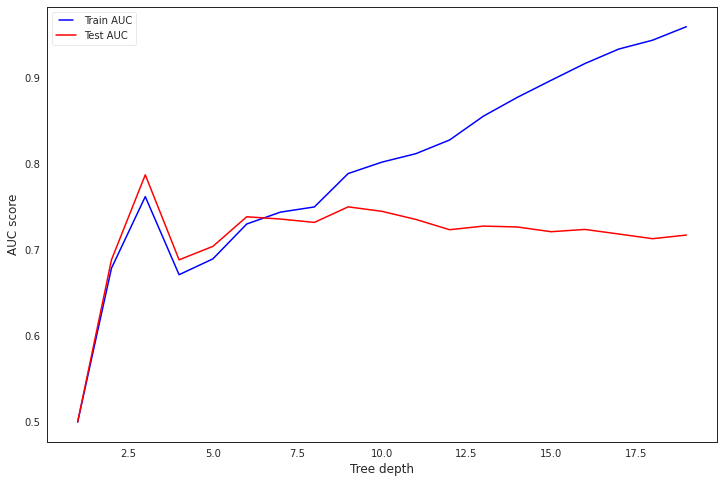

In [177]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(k_range, train_results, 'b', label="Train AUC")
line2, = plt.plot(k_range, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [179]:
# Decision Tree train model. Call model and name it clf 

clf_dt = tree.DecisionTreeClassifier(max_depth=6)
 
# Call up  model to see the parameters you can tune (and their default setting)

print(clf_dt)

# Fit clf to the training data

clf_dt = clf_dt.fit(features_train, target_train)

# Predict clf DT model again test data

target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(max_depth=6)


In [181]:
# Check accuracy and performance of model

acc_dt = accuracy_score(target_test, target_predicted_dt)
prec_dt = precision_score(target_test, target_predicted_dt)
recall_dt = recall_score(target_test, target_predicted_dt)
f1_dt = f1_score(target_test, target_predicted_dt)
cm_dt = confusion_matrix(target_test, target_predicted_dt)
print("DT Accuracy Score", acc_dt)
print(classification_report(target_test, target_predicted_dt))
if DEBUG:
    print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9153920854576354
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.65      0.51      0.57       919

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238



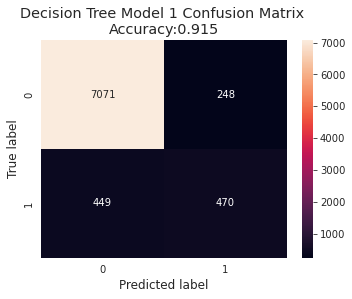

In [183]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Decision Tree Model 1 Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_dt))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [185]:
#verify DT with Cross Validation

scores_dt = cross_val_score(clf_dt, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_dt)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))

Cross Validation Score for each K [0.90743551 0.90986343 0.90409712 0.90986343 0.90986343 0.907739
 0.90318665 0.91047041 0.91198786 0.90834598]
Accuracy: 0.91 (+/- 0.01)


ROC AUC: 0.929


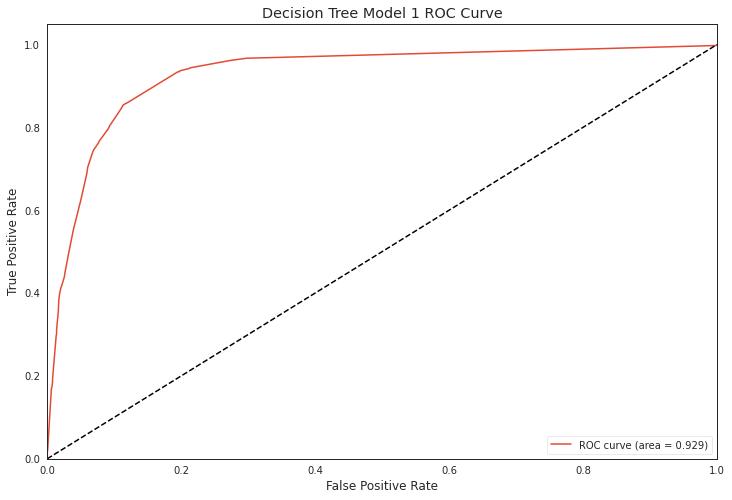

In [187]:
# Determine the false positive and true positive rates

fpr, tpr, _ = roc_curve(target_test, clf_dt.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC

roc_auc_dt = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_dt)
 
# Plot of a ROC curve for a specific class

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model 1 ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## **Logistic Regression Model**

In [191]:
# Logistic Regression: Classifier, Confusion Matrix and cross validation

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
cm_log=confusion_matrix(y_test, logpred)
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7136  183]
 [ 533  386]]
91.0


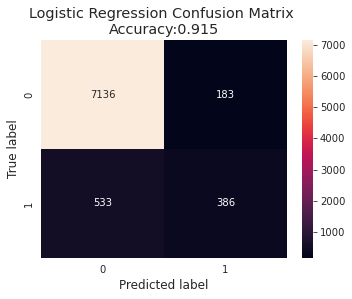

In [193]:
# Source: https://seaborn.pydata.org/examples/heatmap_annotation.html

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix \nAccuracy:{0:.3f}'.format(acc_dt))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [195]:
models = pd.DataFrame({
                'Models': ['Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model'],
                'Score':  [DTREECV, SVCCV, KNNCV, LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Logistic Model,0.907769
2,K-Near Neighbors,0.903217
0,Decision Tree Classifier,0.880910
1,Support Vector Machine,0.855144


### **[Commentary]** The accuracy of a diagnostic test is quantified by the area under the ROC curve (AUC). A perfect test has an AUC of 1, while a test with an AUC of 0.5 is considered ineffective.

### The traditional academic point system for classifying accuracy is as follows:

###   - AUC of 0.90-1: Excellent (Grade A)
###   - AUC of 0.80-0.90: Good (Grade B)
###   - AUC of 0.70-0.80: Fair (Grade C)
###   - AUC of 0.60-0.70: Poor (Grade D)
###   - AUC of 0.50-0.60: Fail (Grade F)

### This guide provides a rough classification based on the AUC value, helping to interpret the diagnostic test's accuracy.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

2.742302604019642e-05
3.2746000215411186e-05
2.940394915640354e-05
3.0206050723791122e-05


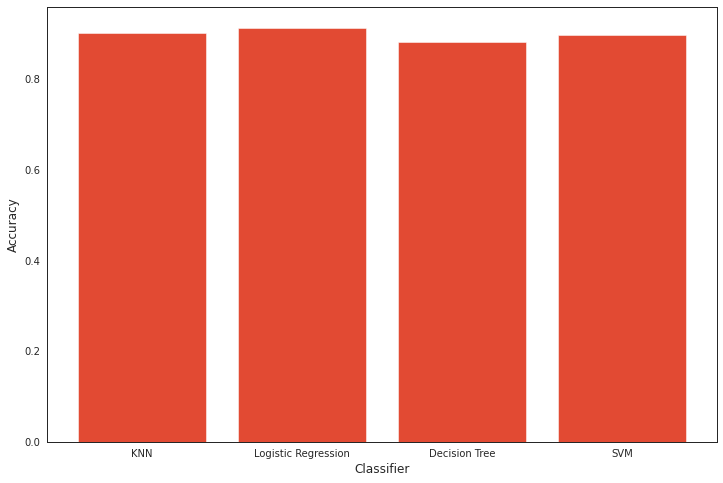

In [199]:
# Initialize the classifiers

from timeit import default_timer as timer

knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
dtree = DecisionTreeClassifier()
svm = SVC(kernel='linear', C=1)

# Train the classifiers

knn.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
knn_train=(end - start)

logreg.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
log_train=(end - start)

dtree.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
dtree_train=(end - start)

svm.fit(X_train, y_train)

start = timer()
end = timer()
print(end - start)
svm_train=(end - start)

# Make predictions on the test set

y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for each classifier

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_dtree = accuracy_score(y_test, y_pred_dtree)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Plot the accuracy of each classifier

classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [acc_knn, acc_logreg, acc_dtree, acc_svm]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

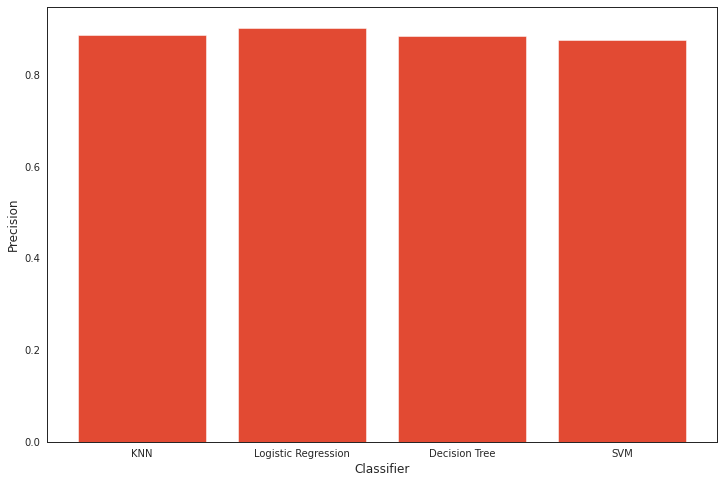

In [201]:
# Calculate precision for each classifier

from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Plot the precision of each classifier

classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
precision = [precision_knn, precision_logreg, precision_dtree, precision_svm]
plt.bar(classifiers, precision)
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.show()

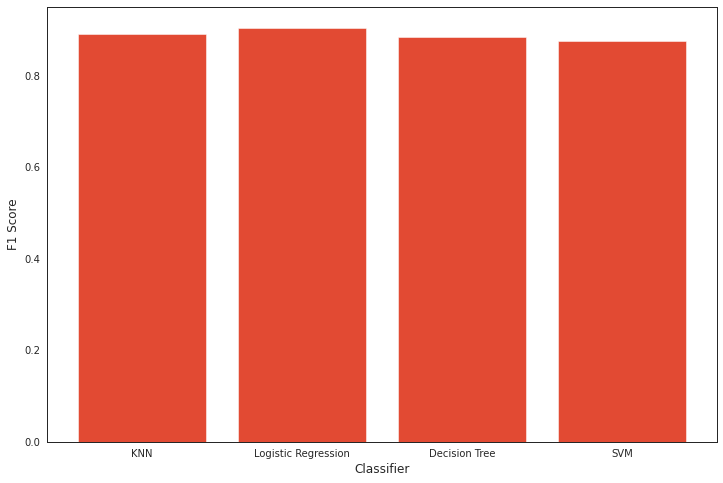

In [203]:
# Calculate F1 score for each classifier

from sklearn.metrics import f1_score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Plot the F1 score of each classifier

classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
f1 = [f1_knn, f1_logreg, f1_dtree, f1_svm]
plt.bar(classifiers, f1)
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.show()

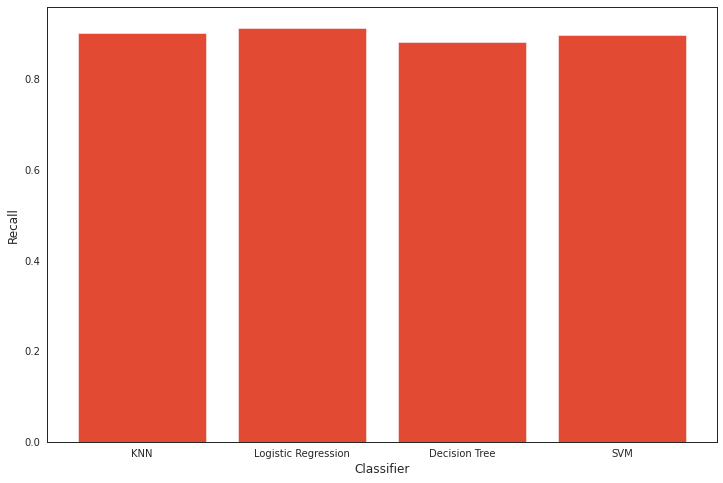

In [205]:
# Calculate recall for each classifier

from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Plot the recall of each classifier

classifiers = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
recall = [recall_knn, recall_logreg, recall_dtree, recall_svm]
plt.bar(classifiers, recall)
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.show()

ROC AUC: 0.894


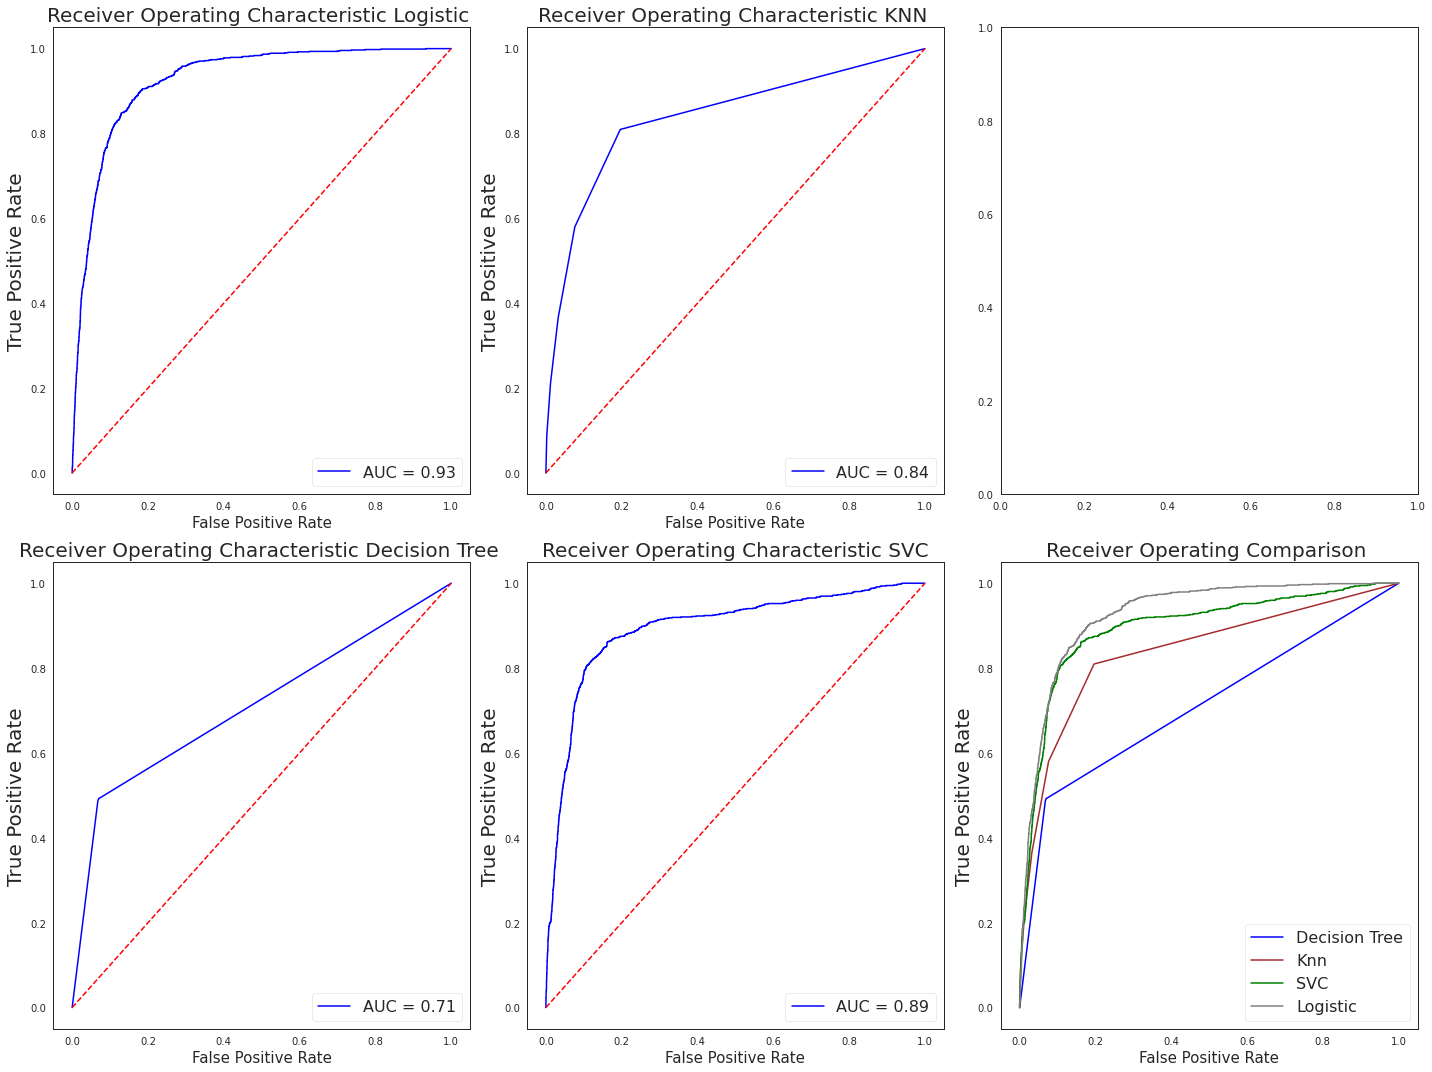

In [209]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))

fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#SVM ---------------------
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, clf_svc.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc_svc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc_svc)
 
# Plot of a ROC curve for a specific class

ax_arr[1,1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic SVC',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fpr, tpr, 'b', label = 'SVC', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

### **Analysis**

### In evaluating the models, we consider two types of incorrect predictions:

###  - False Positives: The model predicts a client subscribed to a term deposit when they did not.
###  - False Negatives: The model predicts a client did not subscribe when they actually did.

### In my assessment:

###  - False Positives are more detrimental because we may erroneously believe we have the client, potentially resulting in missed opportunities in future campaigns.
###  - False Negatives, while not ideal, mean we still have the client, and any oversight can be rectified in the future.

### Therefore, our objective is to identify the best model based on the confusion matrix with the lowest possible False Positives. Upon examination, the Decision Tree Model stands out with the lowest False Positive count, totaling 433.

In [220]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'KNN',
                                   'Decision Tree',
                                   'SVC'],
                         'Training Time (sec)': [log_train*100000,
                                           knn_train*100000,
                                           dtree_train*100000,
                                           svm_train*100000],
                          'Train Accuracy': [acc_logreg,
                                           acc_knn,
                                           acc_dtree,
                                           acc_svc],
                          'Test Accuracy': [f1_logreg,
                                           f1_knn,
                                           f1_dtree,
                                           f1_svc
                                           ]})
acc_table = acc_table.sort_values(by='Train Accuracy', ascending=False)
acc_table.style.background_gradient(cmap='Blues')

,Model,Training Time (sec),Train Accuracy,Test Accuracy
0,Logistic Regression,3.274600,0.913086,0.903879
1,KNN,2.742303,0.900461,0.890069
3,SVC,3.020605,0.899854,0.310777
2,Decision Tree,2.940395,0.882496,0.883211


### **Model Selection**

While there's no "perfect" model here, Logistic Regression stands out as the optimal choice, demonstrating the best combination of Train and Test Accuracy. It does require more training time than other models, however, in a robust system, it should not have a significant impact to overall efficiency and effectiveness for predictions.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Text(0.5, 1.0, 'No of employees')

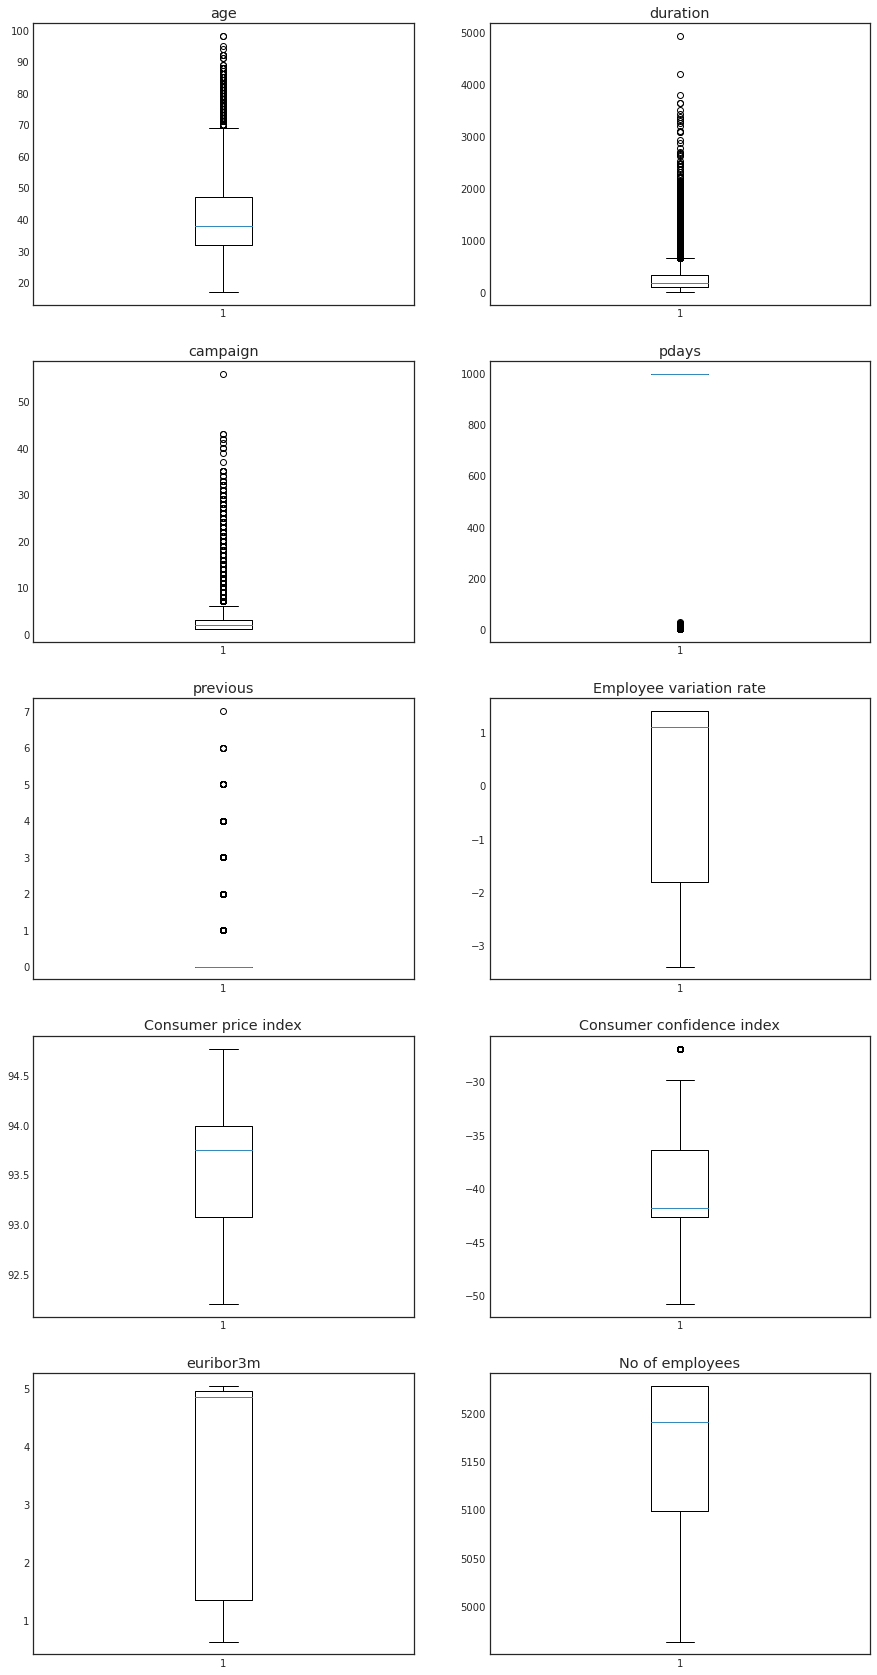

In [223]:
# More feature engineering and exploration: handling outliers; start a new data frame bank_copy to show improvement with new features incorporated

bank_copy=df.copy()
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

### **[Commentary]** Many features do not exhibit outliers except for age, duration and campaign. So, let's fix only those features using IQR method.

In [225]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

Text(0.5, 1.0, 'campaign')

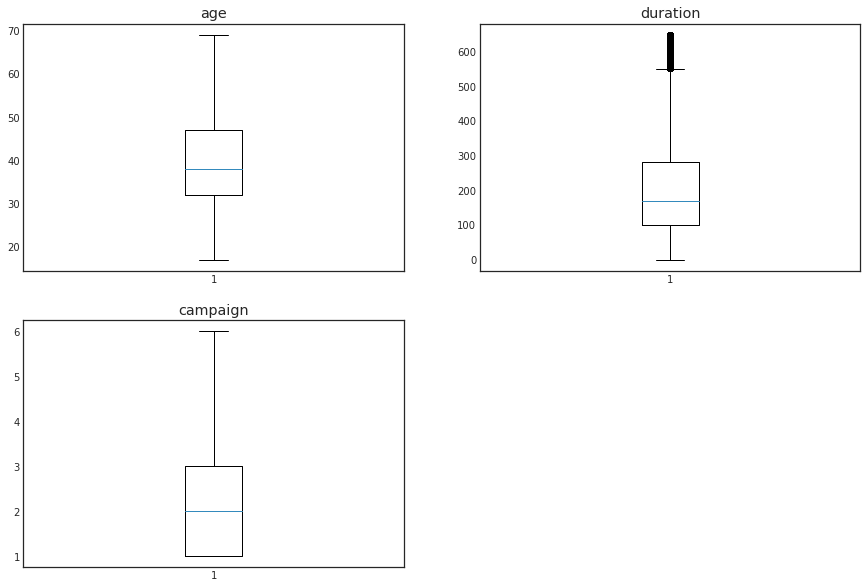

In [227]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

### **[Commentary]** Now that we have removed the outliers, we can proceed for more feature engineering techniques.

In [293]:
# Education- category clubbing¶
# Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school'

bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

In [295]:
# Encoding - Month and Day of week

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [297]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [299]:
# Encoding 999 in pdays as 0
# Encoding 999 in pdays feature (i.e. clients who haven't been contacted for the previous campaign) into 0

bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [301]:
bank_features['pdays'].value_counts()

999    34292
3        367
6        343
4        105
9         54
2         51
12        50
7         48
10        44
5         38
13        28
1         23
11        22
15        20
14        15
8         14
0         13
16        10
17         8
18         6
22         3
21         2
25         1
26         1
27         1
20         1
19         1
Name: pdays, dtype: int64

In [303]:
# Ordinal Number Encoding: encode the features which has yes, no, and unknown. We'll assign yes:1, no:0, and unknown:-1

dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

bank_features.loc[:,['housing','default','loan','y']].head()

## We have encoded the yes/no features with hard encoding

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [305]:
# Frequency encoding

bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

bank_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


In [307]:
# Target Guided Ordinal Encoding: encode marital feature based on the target 'y'. First, let's find the target mean with respect to marital feature

bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [309]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [311]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [313]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

bank_features.marital_ordinal.value_counts()

1    21506
2    10086
0     3907
3       62
Name: marital_ordinal, dtype: int64

In [315]:
# Standardization of numerical variables

dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [319]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']

feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]

scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [321]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()
## We have scaled our numerical features as you can see from the head.

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,899,10688,0,0,0,5,2,0,1,1,0,1,1.694643,0.383434,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
1,3456,8287,-1,0,0,5,2,0,1,1,0,1,1.797965,-0.413575,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
2,3456,8287,0,1,0,5,2,0,1,1,0,1,-0.268482,0.134369,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
3,9110,10688,0,0,0,5,2,0,1,1,0,1,0.041485,-0.399342,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
4,3456,8287,0,0,1,5,2,0,1,1,0,1,1.694643,0.710777,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002


In [323]:
# Feature Selection with new engineered features; feature importances and prune our features to make our model perform well.

X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

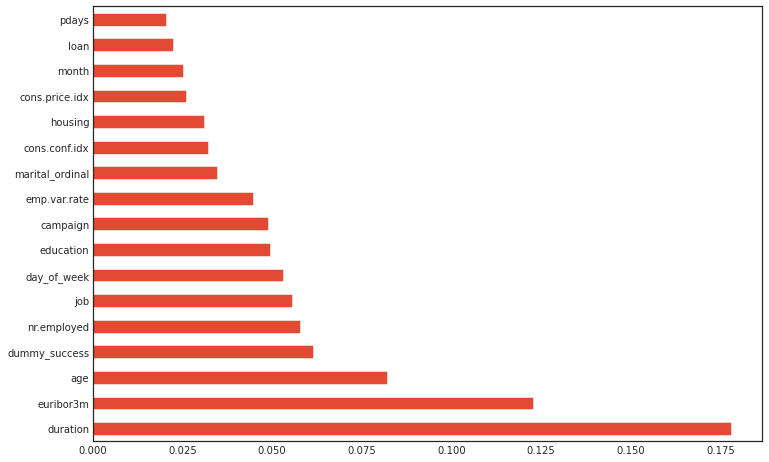

In [325]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

### **Analysis** The analysis highlights the significance of certain input variables based on their coefficients, with the highest coefficients observed in the following variables: duration, euribor3m, age, and nr.employed.

### Interpreting the results and leveraging insights from exploratory data analysis, the bank can strategically focus on key features to attract more customers to buy term deposits:

###  1)  Duration: The analysis emphasizes the substantial impact of call duration on the likelihood of a sale. To enhance the quality of calls and increase the chances of a sale, the bank should prioritize building rapport with customers, reducing wait times, conducting regular check-ins, and actively seeking feedback.

###  2)  Euribor3m: The data suggests that higher interest rates attract more customers. To capitalize on this trend, the bank can consider targeting age groups that are more responsive to higher interest rates (e.g., 4.5-5). Additionally, increasing marketing campaigns during periods of higher interest rates can attract more clients to term deposits.

###  3)  Nr.employed: The positive trend with employed indicates that having more employees leads to more customers. Expanding the workforce can facilitate targeting more leads, conducting effective follow-ups, and ensuring proper customer check-ins. To enhance customer satisfaction, the bank may also consider creating a dedicated after-sales team.

### By strategically addressing these key variables, the bank can optimize its approach to attract and retain customers for term deposits.

In [396]:
# Train and Test Split (80:20); drop the required features and split the data into train and test

X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


In [398]:
# Create the objects

logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv]

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8781518911204416
Decision Tree Test Accuracy: 0.635885307350357
KNN Test Accuracy: 0.8746929484882704
SVC Test Accuracy: 0.9188718011316903


In [420]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6538    0]
 [ 575    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6538
           1       0.00      0.00      0.00       575

    accuracy                           0.92      7113
   macro avg       0.46      0.50      0.48      7113
weighted avg       0.84      0.92      0.88      7113



### **[Commentary]**  The Confusion Matrix provides valuable insights into the model's predictions, indicating 6399 true positives and 178 true negatives, reflecting correct predictions. On the other hand, there are 397 false positives and 139 false negatives, representing incorrect predictions.

### The Classification Report further breaks down the model's performance, revealing a precision of 94%. Precision signifies the accuracy of the model in correctly identifying instances as positive, minimizing the labeling of instances as positive when they are actually negative. This is a crucial metric, especially in the context of lead classification for term deposits, as mislabeling leads could result in inefficient resource allocation. The high precision suggests a strong ability of the model to avoid false positives, enhancing its reliability in identifying potential customers interested in making a term deposit.

In [352]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9191620975678335
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6538
           1       0.00      0.00      0.00       575

    accuracy                           0.92      7113
   macro avg       0.46      0.50      0.48      7113
weighted avg       0.84      0.92      0.88      7113



In [430]:
# LogisticRegression(random_state=0) The mean accuracy of the model is: 0.9246450161675804
# Tuning Hyperparameters with decision Trees and Utility Function to help with tuning

# Returns categorical variables

def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

# Returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, X_train,X_test,y_train,y_test):
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  
def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(X_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, X_train,X_test,y_train,y_test)

In [424]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}

random_search(DecisionTreeClassifier(random_state=0),param_grid, X_train,X_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 17, 'min_samples_leaf': 10, 'max_depth': 6, 'criterion': 'entropy'}

Best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=17, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9406636670416197
Test accuracy is: 0.94067200899761

Train ROC is: 0.7405934005291264
Test ROC is: 0.729800364424701

F score is: 0.565843621399177
Precision is: 0.6926952141057935
Recall is: 0.4782608695652174


### **[Commentary]** With tuning using SMOTE method, we are able to increase accuracy from just using max depth of 8 previously to now 6 with DecisionTreeClassifier.

In [426]:
# I have chosen tuned hyperparameters here

kfold = model_selection.KFold(n_splits = 3)

# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=6, criterion='gini'),n_estimators = 500,)

classifier(model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9423861079865017
Test accuracy is: 0.9426402361872628

Train ROC is: 0.7425173380449224
Test ROC is: 0.7340433851596685

F score is: 0.577639751552795
Precision is: 0.7135549872122762
Recall is: 0.4852173913043478


In [379]:
# Tuning hyperparameters using KNN
# balance data by using SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 28448
Resampled dataset shape 52276


In [381]:
s = StandardScaler()

In [392]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit( s.fit_transform(X_train), y_train)

classifier(knn, s.fit_transform(x_smote),s.transform(X_test), y_smote,y_test)

Train accuracy is: 0.5932550309893642
Test accuracy is: 0.9287220582032898

Train ROC is: 0.5932550309893642
Test ROC is: 0.5853023794006943

F score is: 0.2849083215796897
Precision is: 0.753731343283582
Recall is: 0.17565217391304347


In [391]:
# bagging classifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 8),
                          n_estimators = 15)
classifier(model.fit( s.fit_transform(x_smote), y_smote), s.fit_transform(x_smote),s.transform(X_test),y_smote,y_test)

Train accuracy is: 0.9335832886984468
Test accuracy is: 0.8658793757908055

Train ROC is: 0.9335832886984468
Test ROC is: 0.8136301488289198

F score is: 0.4752475247524753
Precision is: 0.3475462590506838
Recall is: 0.7513043478260869


### **[Commentary]** Bagging with Decision Tree has the best performance according to recall and ROC.  

### The ideal number of neighbors was initially determined to be 24, resulting in an accuracy of 90.5%. Through further experimentation, accuracy has now improved to 93% by reducing the number of neighbors to 8, all achieved without additional feature engineering.

##### Questions

### **Key Insights:**

###  1)  **Duration Significance:** The duration of customer engagement has a substantial impact on the deposit outcome. Longer interactions correlate with a higher probability of customers making a deposit. Focusing on strategies to enhance customer engagement during interactions can positively influence deposit outcomes.

###  2)  **Economic Climate Influence:** The state of the country's economy emerges as a pivotal factor. During periods of economic prosperity, customers tend to be more willing to make deposits. Targeting campaigns during these favorable economic periods can maximize effectiveness.

###  3)  **Month-Specific Campaign Strategy:** October, characterized by heightened economic fluctuations, emerges as a challenging month. Consideration should be given to avoiding campaigns during this period to mitigate potential negative impacts.

###  4)  **Occupational Influence:** Individuals in blue-collar jobs, administrative roles, and technical positions exhibit higher probabilities of making a deposit. Tailoring campaigns to resonate with these occupational groups can yield more favorable outcomes.

###  5)  **Education Level Impact:** Customers with a solid educational background, particularly those with a university degree or higher, show a higher likelihood of making a deposit. Recognizing the influence of education on financial behavior can guide targeted strategies for customer segments.